In [1]:
"""
Copyright 2022 Huawei Technologies Co., Ltd

CREATED:  2022-10-04 13:12:13
MODIFIED: 2022-12-13 10:48:45
"""

# -*- coding:utf-8 -*-
import sys
sys.path.append('../../acllite')
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from model import preprocessing,postprocessing
import acl, cv2, struct, time
import numpy as np
from PIL import Image, ImageDraw

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
device_id = 0
input_size = 640
img_path = "data/dog.jpg"
model_path = "model/yolov5s6_v6.om"

In [4]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [5]:
acl_resource = AclLiteResource()
acl_resource.init()

model = AclLiteModel(model_path, 0)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 4335000
Create model output dataset success
Init model resource success


In [6]:
img_org_bgr = cv2.imread(img_path)
data = preprocessing(img_org_bgr,model._model_desc)

%timeit -n 10 -r 3
result_list = model.execute([data,])    

bboxes = postprocessing(result_list[0],img_org_bgr,model._model_desc)

model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 640, 640, 3]}, 0)
model input datatype 4
model output size 1
output  0
model output dims ({'name': 'Concat_404:0:output', 'dimCount': 3, 'dims': [1, 25500, 85]}, 0)
model output datatype 1
[Model] class Model init resource stage success
model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 640, 640, 3]}, 0)
model input datatype 4
model output size 1
output  0
model output dims ({'name': 'Concat_404:0:output', 'dimCount': 3, 'dims': [1, 25500, 85]}, 0)
model output datatype 1
[Model] class Model init resource stage success


In [7]:
result_list[0].shape

(1, 25500, 85)

In [8]:
bboxes

[[133.0, 226.0, 312.0, 542.0, 0.9135742, 16],
 [127.0, 128.0, 565.0, 425.0, 0.9135742, 1],
 [471.0, 75.0, 691.0, 171.0, 0.71728516, 2]]

In [9]:
img = Image.open(img_path)
img1 = ImageDraw.Draw(img)
import random as rnd

for bbox in bboxes:
    color ="#FF"+''.join([rnd.choice('0123456789ABCDEF') for j in range(4)])
    img1.rectangle(list(bbox[:4]), outline =color, width=3)
    print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])
for bbox in bboxes:
    img1.rectangle((bbox[0],bbox[1],bbox[0]+45,bbox[1]+15),outline = (255,255,255),width=10)
    img1.text((bbox[0]+5, bbox[1]),coco_labels[int(bbox[5])],(0,0,0),thickness=10)

[133.0, 226.0, 312.0, 542.0] 0.9135742 16 dog
[127.0, 128.0, 565.0, 425.0] 0.9135742 1 bicycle
[471.0, 75.0, 691.0, 171.0] 0.71728516 2 car


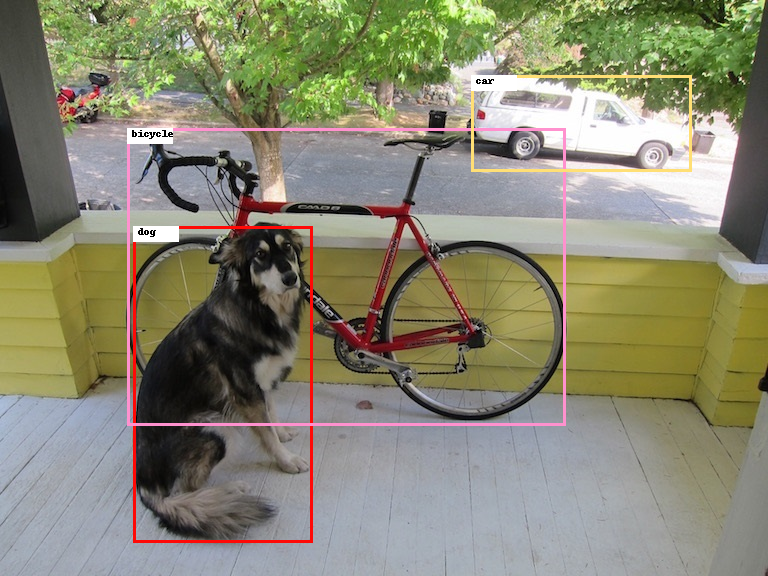

In [10]:
img